# Homework 4

## Ex 6.1

We define a matrix $A=\begin{bmatrix}1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9\end{bmatrix}$. Compute its determinant using the `MATLAB` function `det`. Explain why the result is not an integer.

In [1]:
format long
A = [1 2 3; 4 5 6; 7 8 9];
det(A)


ans =

    -9.516197353929915e-16




In [2]:
[L U] = lu(A)


L =

   0.142857142857143   1.000000000000000                   0
   0.571428571428571   0.500000000000000   1.000000000000000
   1.000000000000000                   0                   0


U =

   7.000000000000000   8.000000000000000   9.000000000000000
                   0   0.857142857142857   1.714285714285714
                   0                   0  -0.000000000000000




This error is due to round-off errors appearing in LU decomposition.

# Ex 6.2

The goal of this exercise is to compare the performances of the LU and Cholesky methods.
1. Write a function `LUFacto` returning the matrices $L$ and $U$ determined via Algorithm 6.1. If the algorithm cannot be executed (division by $0$), return an error message.

In [129]:
%%file LUFacto.m

function [L U] = LUFacto(A)
    n = size(A,1);
    
    for k=1:(n-1)
        if (A(k,k)==0)
            disp('Error! Pivot must be nonzero')
            L = NaN;
            U = NaN;
            return
        else
            for i=(k+1):n
                A(i,k) = A(i,k)/A(k,k);
                for j=(k+1):n
                    A(i,j) = A(i,j) - A(i,k)*A(k,j);
                end
            end
        end
    end
    L = eye(n) + tril(A,-1);
    U = triu(A);
end

Created file 'D:\GitHub\NLA-IMA\hw4\LUFacto.m'.


2. Write a function `Cholesky` returning the matrix $B$ computed by Algorithm 6.2. If the algorithm cannot be executed (nonsymmetric matrix, division by $0$, negative square root), return an error message. Compare with the `MATLAB` function `chol`.

In [123]:
%%file Cholesky.m

function B = Cholesky(A)
    if (A~=A')
        disp('Input must be symmetric!')
        B = NaN;
        return
    else
        B = tril(A);
        n = size(A,1);
        for j=1:n
            for k=1:(j-1)
                B(j,j) = B(j,j) - (B(j,k))^2;
            end
            if (B(j,j)<=0)
                disp('Error! Pivot must be positive')
                B = NaN;
                return
            else
                B(j,j) = sqrt(B(j,j));
                for i=(j+1):n
                    for k=1:(j-1)
                        B(i,j) = B(i,j) - B(j,k)*B(i,k);
                    end
                    B(i,j) = B(i,j)/B(j,j);
                end
            end
        end
    end
end

Created file 'D:\GitHub\NLA-IMA\hw4\Cholesky.m'.


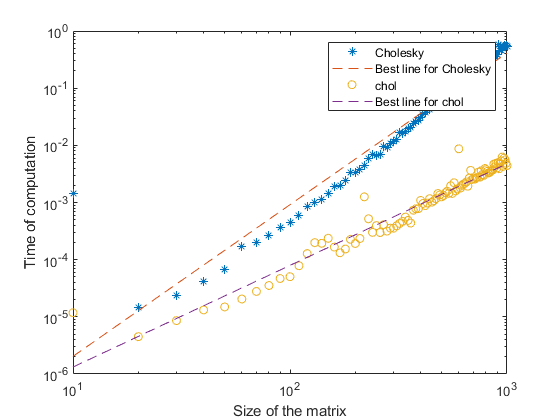

In [23]:
times = zeros(2,length(1:100));

for i = 1:100
    n = i*10;
    A = PdSMat(n);
    
    tic
    B = Cholesky(A);
    times(1,i) = toc;
    
    tic
    B = chol(A);
    times(2,i) = toc;
end
x = 10:10:1000;
p1 = polyfit(log(x),log(times(1,:)),1);
p2 = polyfit(log(x),log(times(2,:)),1);

figure
loglog(x,times(1,:),'*')
hold on
loglog(x,exp(p1(2)).*x.^p1(1),'--')
loglog(x,times(2,:),'o')
loglog(x,exp(p2(2)).*x.^p2(1),'--')
hold off
xlabel('Size of the matrix')
ylabel('Time of computation')
legend('Cholesky','Best line for Cholesky','chol','Best line for chol')

In [24]:
p1
p2


p1 =

   2.653036013266808 -19.212901563663547


p2 =

   1.777763598656285 -17.626797864320473




We can see that $\mathrm{time}_\mathrm{Cholesky}(n) \approx \exp(-19.2129)n^{2.6530}$ and $\mathrm{time}_\mathrm{chol}(n) \approx \exp(-17.6267)n^{1.7777}$, under the assumption that computation time behaves like $C_1 \cdot n^{C_2}$.

3. For $n = 10, 20, . . . , 100$, we define a matrix `A=MatSdp(n)` (see Exercise 2.20) and a vector `b=ones(n,1)`. Compare:
+ On the one hand, the running time for computing the matrices $L$ and $U$ given by the function `LUFacto`, then the solution $x$ of the system $Ax = b$. Use the functions `BackSub` and `ForwSub` defined in Exercise 5.2.
+ On the other hand, the running time for computing the matrix $B$ given by the function `Cholesky`, then the solution $x$ of the system $Ax = b$. Use the functions `BackSub` and `ForwSub`.
Plot on the same graph the curves representing the running times in terms
of $n$. Comment.

In [15]:
%%file BackSub.m

function x = BackSub(U,y)
    n = size(U,1);
    x = zeros(n,1);
    for i = n:-1:1
        s = 0;
        for j = n:-1:(i+1)
            s = s + U(i,j)*x(j);
        end
        x(i) = (y(i)-s)/U(i,i);
    end
end

Created file 'D:\GitHub\NLA-IMA\hw4\BackSub.m'.


In [16]:
%%file ForwSub.m

function x = ForwSub(L,y)
    n = size(L,1);
    x = zeros(n,1);
    for i = 1:n
        s = 0;
        for j = 1:(i-1)
            s = s + L(i,j)*x(j);
        end
        x(i) = (y(i)-s)/L(i,i);
    end
end

Created file 'D:\GitHub\NLA-IMA\hw4\ForwSub.m'.


In [17]:
%%file SymmetricMat.m

function S = SymmetricMat(n)
    S = rand(n);
    S = S + S';
end

Created file 'D:\GitHub\NLA-IMA\hw4\SymmetricMat.m'.


In [18]:
%%file PdSMat.m

function S = PdSMat(n)
    S = SymmetricMat(n);
    [P, D] = eig(S);
    D = abs(D);
    D = D + norm(D)*eye(size(D));
    S = P*D*inv(P);
end

Created file 'D:\GitHub\NLA-IMA\hw4\PdSMat.m'.


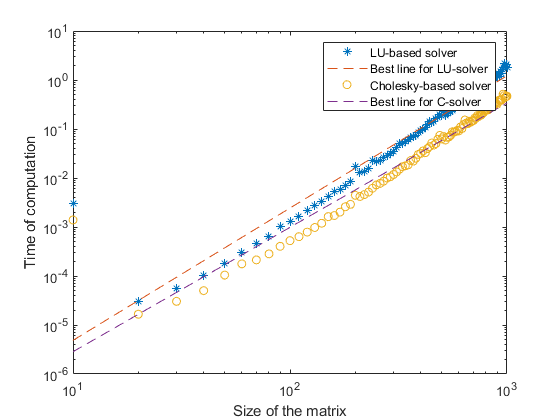

In [25]:
times = zeros(2,length(1:50));

for i = 1:100
    n = i*10;
    A = PdSMat(n);
    b = ones(n,1);
    
    tic;
    [L U] = LUFacto(A);
    x1 = BackSub(U,ForwSub(L,b));
    times(1,i) = toc;
    
    tic;
    B = Cholesky(A);
    x2 = BackSub(B',ForwSub(B,b));
    times(2,i) = toc;
end

x = 10:10:1000;
p1 = polyfit(log(x),log(times(1,:)),1);
p2 = polyfit(log(x),log(times(2,:)),1);

figure
loglog(x,times(1,:),'*')
hold on
loglog(x,exp(p1(2)).*x.^p1(1),'--')
loglog(x,times(2,:),'o')
loglog(x,exp(p2(2)).*x.^p2(1),'--')
hold off
xlabel('Size of the matrix')
ylabel('Time of computation')
legend('LU-based solver','Best line for LU-solver','Cholesky-based solver','Best line for C-solver')

In [26]:
p1
p2


p1 =

   2.700435568617929 -18.452550099850395


p2 =

   2.538527947687385 -18.613953300022562




We see that $\mathrm{time}_\mathrm{LU-Solver}(n) \approx \exp(-18.4525)n^{2.7004}$ and $\mathrm{time}_\mathrm{C-Solver}(n) \approx \exp(-18.6139)n^{2.5385}$, under the assumption that computation time behaves like $C_1 \cdot n^{C_2}$.

## Ex 6.4

The goal of this exercise is to evaluate the influence of row permutation in Gaussian elimination. Let $A$ and $b$ be defined by `e=1.E-15`, `A=[e 1 1;1 -1 1; 1 0 1]` and  `b=[2 0 1]’`.
1. Compute the matrices `L` and `U` given by the function `LUFacto` of Exercise 6.2.

In [11]:
format long
e=1.E-16;
A=[e 1 1;1 -1 1; 1 0 1];
b=[2 0 1]';
[L, U] = LUFacto(A)
det(A)


L =

   1.0e+16 *

   0.000000000000000                   0                   0
   1.000000000000000   0.000000000000000                   0
   1.000000000000000   0.000000000000000   0.000000000000000


U =

   1.0e+16 *

   0.000000000000000   0.000000000000000   0.000000000000000
                   0  -1.000000000000000  -1.000000000000000
                   0                   0                   0


ans =

   1.000000000000000




2. We define two matrices `l` and `u` by `[l u]=LUFacto(p*A)`, where `p` is the permutation matrix defined by the instruction `[w z p]=lu(A)`. Display the matrices `l` and `u`. What do you observe?

In [14]:
[w z p]=lu(A);
p
[l u] = LUFacto(p*A)


p =

     0     1     0
     1     0     0
     0     0     1


l =

   1.000000000000000                   0                   0
   0.000000000000000   1.000000000000000                   0
   1.000000000000000   1.000000000000000   1.000000000000000


u =

   1.000000000000000  -1.000000000000000   1.000000000000000
                   0   1.000000000000000   1.000000000000000
                   0                   0  -1.000000000000000




First, notice that in this computation `e=1.E-16`. Notice that by permuting the rows of `A` we obtain a better-posed problem: the floating-point arithmetic neglects the small perturbation, avoiding losing the linear independence of the row of `p*A` while doing Gaussian elimination. (See the notes attached to this document)

3. Determine the solution of the system $Ax = b$ computed by the instruction `BackSub (U,ForwSub(L,b))`, then the solution computed by the instruction `BackSub (u,ForwSub(l,p*b))`. Compare with the exact solution $x = [0, 1, 1]^\mathrm{T}$. Conclude.

In [13]:
x1 = BackSub(U,ForwSub(L,b))
x2 = BackSub(u,ForwSub(l,p*b))


x1 =

   NaN
  -Inf
   Inf


x2 =

  -0.000000000000000
   1.000000000000000
   1.000000000000000




The issue here is the floating-point arithmetic. Employing Gaussian elimination, we can see that we obtain a singular matrix `U` due to the round-off of the FP arithmetic. On the other hand, matrix `U` is non-singular due to the reorder of the rows of `A`. This reorder ensures longer pivots while doing Gaussian elimination. In conclusion, one way of precondition a matrix is to ensure pivots with a larger magnitude. In this manner,  we avoid a magnification of tiny perturbations errors and undesired round-off errors of FP arithmetic.

## Ex 6.9

Let $A$ be a band matrix of order $n$ and half bandwidth $p$. For $n >> p >> 1$ compute the number of operations $N_\mathrm{op}(n, p)$ required for the LU factorization (having in mind Proposition 6.2.1).

Consider the Algorithm 6.1:

In [ ]:
for k=1:(n-1)
    for i=(k+1):n
        A(i,k) = A(i,k)/A(k,k);
        for j=(k+1):n
            A(i,j) = A(i,j) - A(i,k)*A(k,j);
        end
    end
end

This algorithm is a compact form of Gaussian elimination. For each step $k$, we pick a row $i$ below the $k-$th row and choose $\alpha$ to delete the first term of the $k-$th row by subtracting the $i-$th row. This $\alpha$ must be $a_{i,k}/a_{k,k}$. Then we apply the elementary row operation.

Due to the additional structure of the matrix $A$, we can truncate the inner loops until the half bandwidth instead of studying the whole row vector. The associated Algorithm is:

In [ ]:
for k=1:(n-1)
    for i=(k+1):min([n k+p])
        A(i,k) = A(i,k)/A(k,k);
        for j=(k+1):min([n k+p])
            A(i,j) = A(i,j) - A(i,k)*A(k,j);
        end
    end
end

Due to the previous algorithm, we find that the number of operations is described by $$N_\mathrm{op}(n,p) = \sum_{k=1}^{n-1} \sum_{i=k+1}^{\min\{n, k+p\}} \left( 1 + \sum_{j=k+1}^{\min\{n, k+p\}} 1 \right).$$

Notice that $k+p\leq n$ if and only if $k\leq n-p$. Thus, $$\begin{array}{rl} N_\mathrm{op}(n,p) & = \sum_{k=1}^{n-1} (\min\{n, k+p\} - k)(\min\{n, k+p\} -k-1)\\ & \\ &= \sum_{k=1}^{n-p} p(p-1) + \sum_{k=n-p+1}^{n-1} (n - k)(n -k-1)\\ & \\ & = p(p-1)(n-p) + \sum_{k=0}^{p-2} k(k+1)\\ & \\ & =  p(p-1)(n-p) + \dfrac{1}{3}p(p-1)(p-2).\end{array}$$

We conclude that $N_\mathrm{op} = O(n)$ **if** $p$ is fixed.

## Addendum

Check [this](hw4_add.ipynb) Jupyter notebook.